# Creating a DataPattern for the timepix quad

This notebook shows an example of how to create a DataPattern for a measurement with the timepix quad.



In [1]:
import matplotlib.pyplot as plt
from pyfdd import DataPattern
from ecsli_tools import *

In [ ]:
filename1 = "/home/user/path/to/pattern_1.txt"
filename2 = "/home/user/path/to/pattern_2.txt"

## Creating the DataPattern

The arguments to create a data pattern are the path to the data matrix, the number of chips (2 for the time quad 1 for the others) and the real size of the central pixels.

Two DataPattern can be added together.

In [ ]:
dp1 = DataPattern(file_path=filename1, nChipsX=2, nChipsY=2, real_size=3)
dp2 = DataPattern(file_path=filename2, nChipsX=2, nChipsY=2, real_size=3)
dp = dp1 + dp2

## Manipulation of the data pattern

In [5]:
# Manipulation methods

# Mask
mask = load_tpxquad_mask("/home/user/path/to/detector_mask.txt")
dp.set_mask(mask, expand_by=0) # Set expand by > 0 when pixels are not added together.
# mask pixels for which its number of counts is over 4 standard deviations from averagage
dp.mask_std(4)

# -Orient
# use 'rr','rl','mh',mv' for rotate right, rotate left, mirror horizontal and mirror vertical
# in the desired order
dp.manip_orient('rr,mh')  # TimepixQuad orientation

# -Angular calibration
dp.manip_create_mesh(pixel_size=0.055, distance=315)

# Zero central pix (this can also be indicated during manip_compress)
#dp.zero_central_pix(1)

# Add extra pixels to account for bigger central pixels
dp.manip_correct_central_pix()

# -Sum pixels, zero central pixels and remove edge pixels all in one
# here 8x8 pixels are summed, if needed more pixels will be removed and a warning issued
dp.manip_compress(factor=8, rm_central_pix=2, rm_edge_pix=4)

Number of chips -  4
warning removed edge pixels increased to  6
rest -  2
final_size 63
Total counts is, 963811.0


## Set the angular orientation for the pattern

<IPython.core.display.Javascript object>


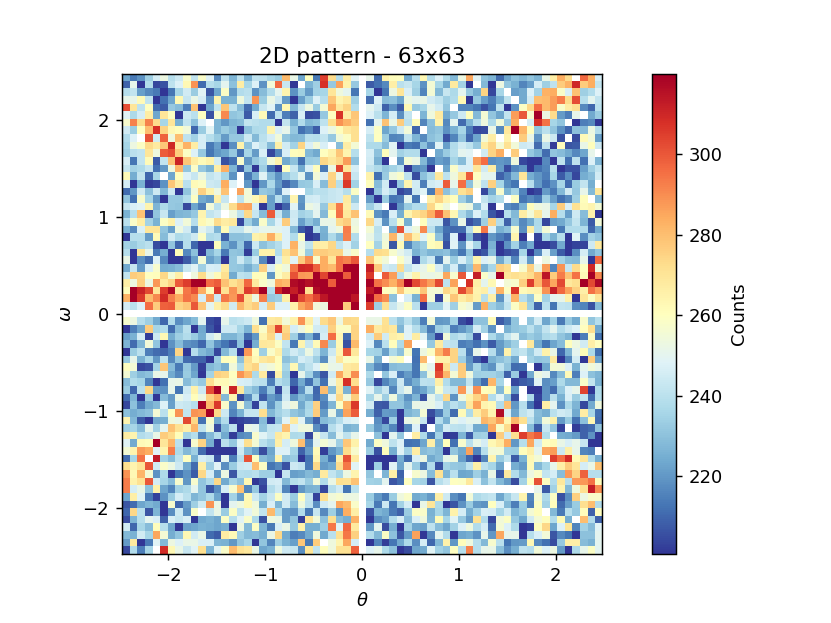

In [6]:
%matplotlib notebook
fg = plt.figure()
ax = fg.add_subplot('111')
dp.draw(ax2, percentiles=(0.04, 0.99))
dp.get_angle_tool()

In [7]:
print('angle widget, center ', dp.center, ', angle ', dp.angle)
# set_fit_region uses the angular values from the orientation 
# but these can also be set in the function input
dp.set_fit_region(distance=2.8)

angle widget, center  [-0.1572438988208571, 0.26709923727655838] , angle  1.340007780899707


## Save as json file

In [8]:
dp.io_save_json('/home/user/quad_datapattern.json')